In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
df = pd.read_csv('data/cleaned_merged_seasons.csv')

C:\Users\22352155\AppData\Local\Temp\ipykernel_16088\2416074750.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/cleaned_merged_seasons.csv')


In [41]:
df['cumulative_points'] = df[['name','season_x','total_points']].groupby(['name', 'season_x']).cumsum()
df['cumulative_goals'] = df[['name','season_x','goals_scored']].groupby(['name', 'season_x']).cumsum()
df['cumulative_assists'] = df[['name','season_x','assists']].groupby(['name', 'season_x']).cumsum()

In [42]:
filter_df = df[df['GW'] == 38]

In [43]:
pd.crosstab(filter_df["value"], filter_df["cumulative_points"])

cumulative_points,-3,-1,0,1,2,3,4,5,6,7,...,213,228,231,234,242,244,255,259,265,273
value,,,,,,,,,,,,,,,,,,,,,
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,4,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,41,6,3,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
40,1,0,115,8,4,3,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41,0,0,2,3,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
filter_df.pivot_table(
    ["cumulative_points", "transfers_in", "value"],
    ["position"],
    aggfunc="mean",
)

,cumulative_points,transfers_in,value
position,,,
DEF,47.855422,6461.825301,46.573494
FWD,55.556604,15523.003145,61.867925
GK,41.957854,5042.321839,44.590038
MID,52.105207,9009.012752,54.091392


In [45]:
columns_to_show = ["value", "cumulative_points", "bps"]

filter_df.groupby(["name"])[columns_to_show].describe(percentiles=[])

value                                         \
                      count       mean       std   min   50%   max   
name                                                                 
Aaron Connolly          2.0  52.500000  0.707107  52.0  52.5  53.0   
Aaron Cresswell         5.0  52.200000  3.271085  49.0  51.0  57.0   
Aaron Lennon            4.0  51.000000  4.242641  46.0  51.5  55.0   
Aaron Mooy              3.0  50.666667  1.154701  50.0  50.0  52.0   
Aaron Ramsdale          4.0  44.250000  5.315073  40.0  43.0  51.0   
...                     ...        ...       ...   ...   ...   ...   
Zak Swanson             1.0  40.000000       NaN  40.0  40.0  40.0   
Zeze Steven Sessegnon   2.0  41.500000  2.121320  40.0  41.5  43.0   
Álvaro Fernández        2.0  42.500000  3.535534  40.0  42.5  45.0   
Çaglar Söyüncü          3.0  50.000000  2.645751  48.0  49.0  53.0   
Ørjan Nyland            1.0  40.000000       NaN  40.0  40.0  40.0   

                      cumulative_points                                    \
                                  count       mean        std   min   50%   
name                                                                        
Aaron Connolly                      2.0  21.500000  23.334524   5.0  21.5   
Aaron Cresswell                     5.0  89.800000  47.415187  34.0  94.0   
Aaron Lennon                        4.0  46.500000  19.192012  22.0  49.5   
Aaron Mooy                          3.0  57.333333  50.649120   0.0  76.0   
Aaron Ramsdale                      4.0  64.000000  74.013512   0.0  61.5   
...                                 ...        ...        ...   ...   ...   
Zak Swanson                         1.0   0.000000        NaN   0.0   0.0   
Zeze Steven Sessegnon               2.0   0.000000   0.000000   0.0   0.0   
Álvaro Fernández                    2.0  31.000000   0.000000  31.0  31.0   
Çaglar Söyüncü                      3.0  42.333333  35.104606   2.0  59.0   
Ørjan Nyland                        1.0   0.000000        NaN   0.0   0.0   

                               bps                                         
                         max count       mean        std  min   50%   max  
name                                                                       
Aaron Connolly          38.0   2.0   1.500000   2.121320  0.0   1.5   3.0  
Aaron Cresswell        153.0   5.0  12.200000  10.756393  0.0  11.0  29.0  
Aaron Lennon            65.0   4.0   2.500000   3.316625  0.0   1.5   7.0  
Aaron Mooy              96.0   3.0  10.000000   8.717798  0.0  14.0  16.0  
Aaron Ramsdale         133.0   4.0   9.750000  14.150972  0.0   4.5  30.0  
...                      ...   ...        ...        ...  ...   ...   ...  
Zak Swanson              0.0   1.0   0.000000        NaN  0.0   0.0   0.0  
Zeze Steven Sessegnon    0.0   2.0   0.000000   0.000000  0.0   0.0   0.0  
Álvaro Fernández        31.0   2.0   0.000000   0.000000  0.0   0.0   0.0  
Çaglar Söyüncü          66.0   3.0   5.333333   9.237604  0.0   0.0  16.0  
Ørjan Nyland             0.0   1.0   0.000000        NaN  0.0   0.0   0.0  

[989 rows x 18 columns]

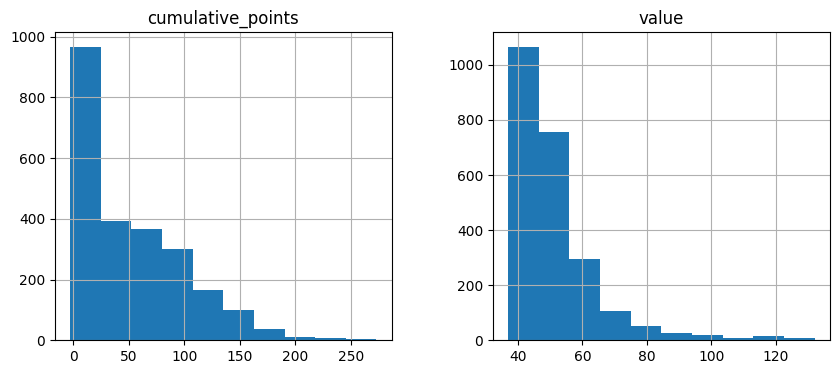

In [46]:
features = ["cumulative_points", "value"]
filter_df[features].hist(figsize=(10, 4));

In [47]:
# filter_df[features].plot(
#     kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
# );

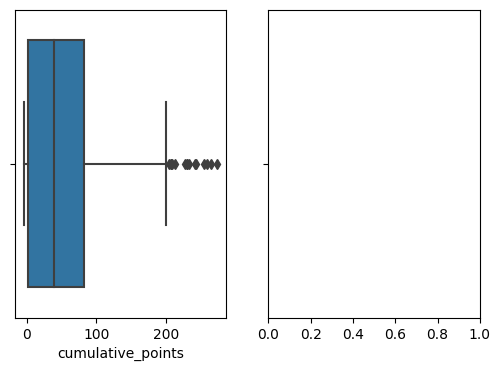

In [48]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="cumulative_points", data=filter_df, ax=axes[0]);
# sns.violinplot(data=filter_df["cumulative_points"], ax=axes[1]);

In [49]:
filter_df[features].describe()

,cumulative_points,value
count,2350.000000,2350.000000
mean,49.944255,51.433191
std,49.630228,13.028786
min,-3.000000,37.000000
25%,2.000000,44.000000
50%,39.000000,47.000000
75%,82.000000,55.000000
max,273.000000,132.000000


In [50]:
highest_points = filter_df[filter_df['cumulative_points']>=200]
highest_points.head()

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,cumulative_points,cumulative_goals,cumulative_assists
6759,6759,2016-17,Harry Kane,FWD,NaN,0,3,83,0,20.4,...,149800,156641,6841,119,False,0,38,209,27,7
17110,17110,2017-18,Mohamed Salah,MID,NaN,1,0,32,1,38.6,...,160600,175619,15019,106,True,0,38,273,29,12
31837,31837,2018-19,Andrew Robertson,DEF,NaN,0,0,29,1,14.8,...,-260556,10722,271278,67,True,0,38,213,0,12
32077,32077,2018-19,Mohamed Salah,MID,NaN,0,0,4,1,3.5,...,-123436,35332,158768,132,True,0,38,259,22,12
32105,32105,2018-19,Pierre-Emerick Aubameyang,MID,NaN,0,3,47,0,3.6,...,47790,72259,24469,108,False,0,38,205,22,7


In [51]:
df["value"].value_counts()

45     13146
44      7654
50      6399
43      5889
40      5388
       ...  
132       12
133       10
136        5
135        2
134        2
Name: value, Length: 100, dtype: int64

This is the correlation matrix for only the relevant features. Relevancy was found through trial and error of correlation matrices.

C:\Users\22352155\AppData\Local\Temp\ipykernel_16088\551360621.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[relevant_features].corr()


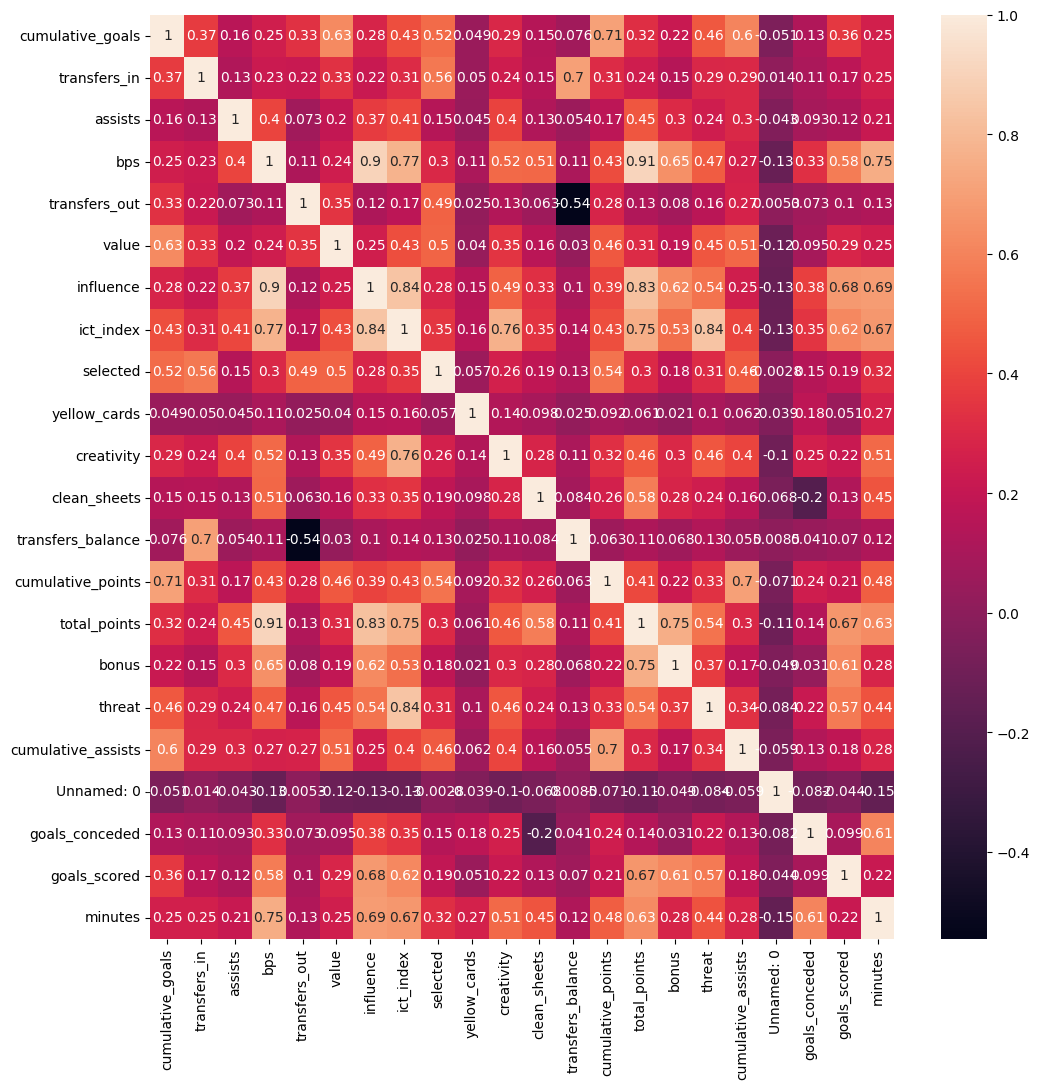

In [52]:
# Drop non-numerical variables
relevant_features = list(
    set(df.columns)
    - {
        "name",
        "team",
        "was_home",
        "team_a_score",
        "GW",
        "round",
        "fixture",
        "element",
        "saves",
        "team_h_score",
        "own_goals",
        "saves",
        "opponent_team",
        "penalties_missed",
        "penalties_saved",
        "red_cards",
        "position",
    }
)
corr_matrix = df[relevant_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr_matrix,ax=axes, annot=True);

This is the correlation matrix for all players where gw = 0

C:\Users\22352155\AppData\Local\Temp\ipykernel_16088\4224743471.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1_matrix = df_gw1[gw1_rel_features].corr()


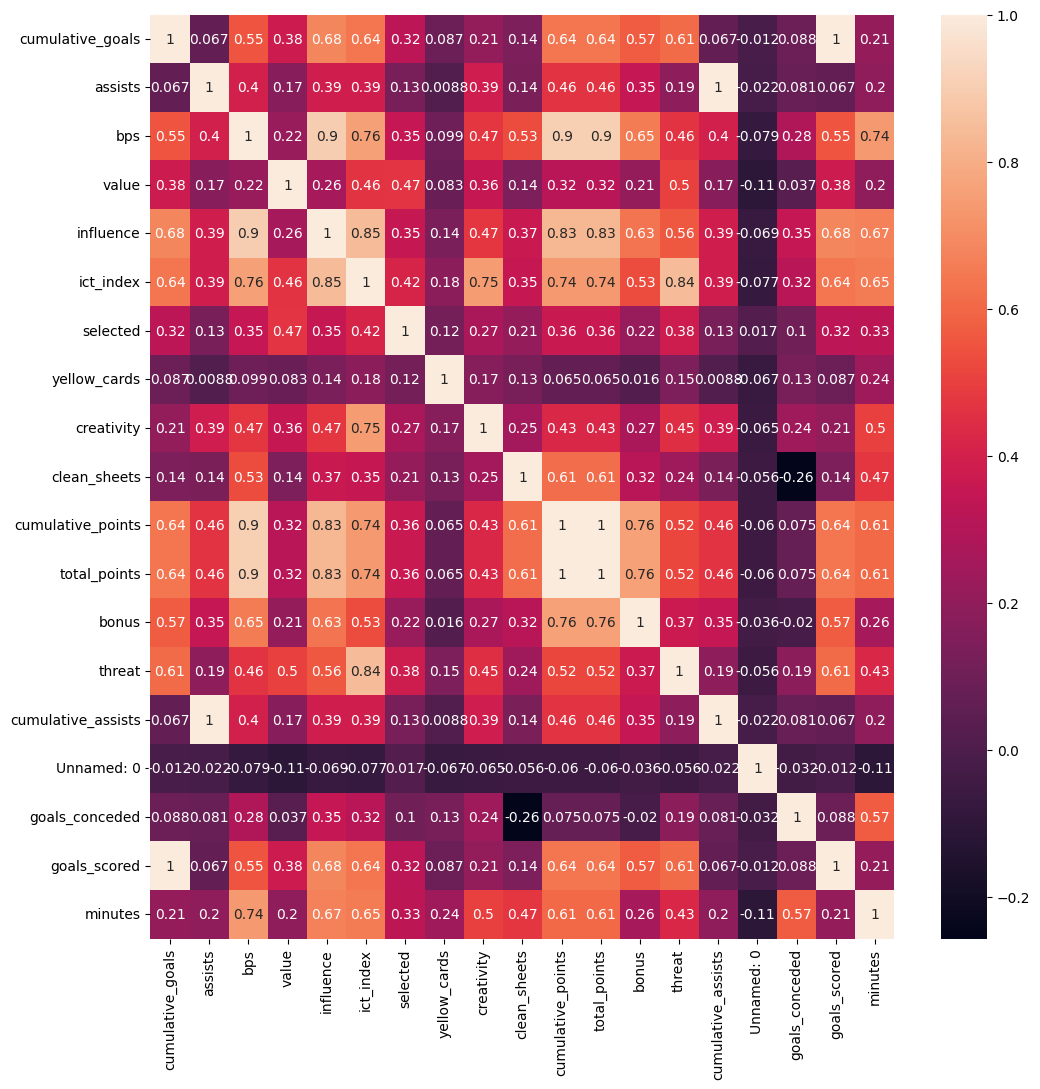

In [53]:
gw1_rel_features = list(
    set(relevant_features)
    - {
        'starts',
        'expected_goal_involvements',
        'expected_goals',
        'transfers_balance',
        'expected_assists',
        'expected_goals_conceded',
        'transfers_out',
        'transfers_in'
    }
)

df_gw1 = df.loc[df['GW'] == 1]
corr1_matrix = df_gw1[gw1_rel_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr1_matrix,ax=axes, annot=True);

C:\Users\22352155\AppData\Local\Temp\ipykernel_16088\2360506500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filter_df[relevant_features].corr()


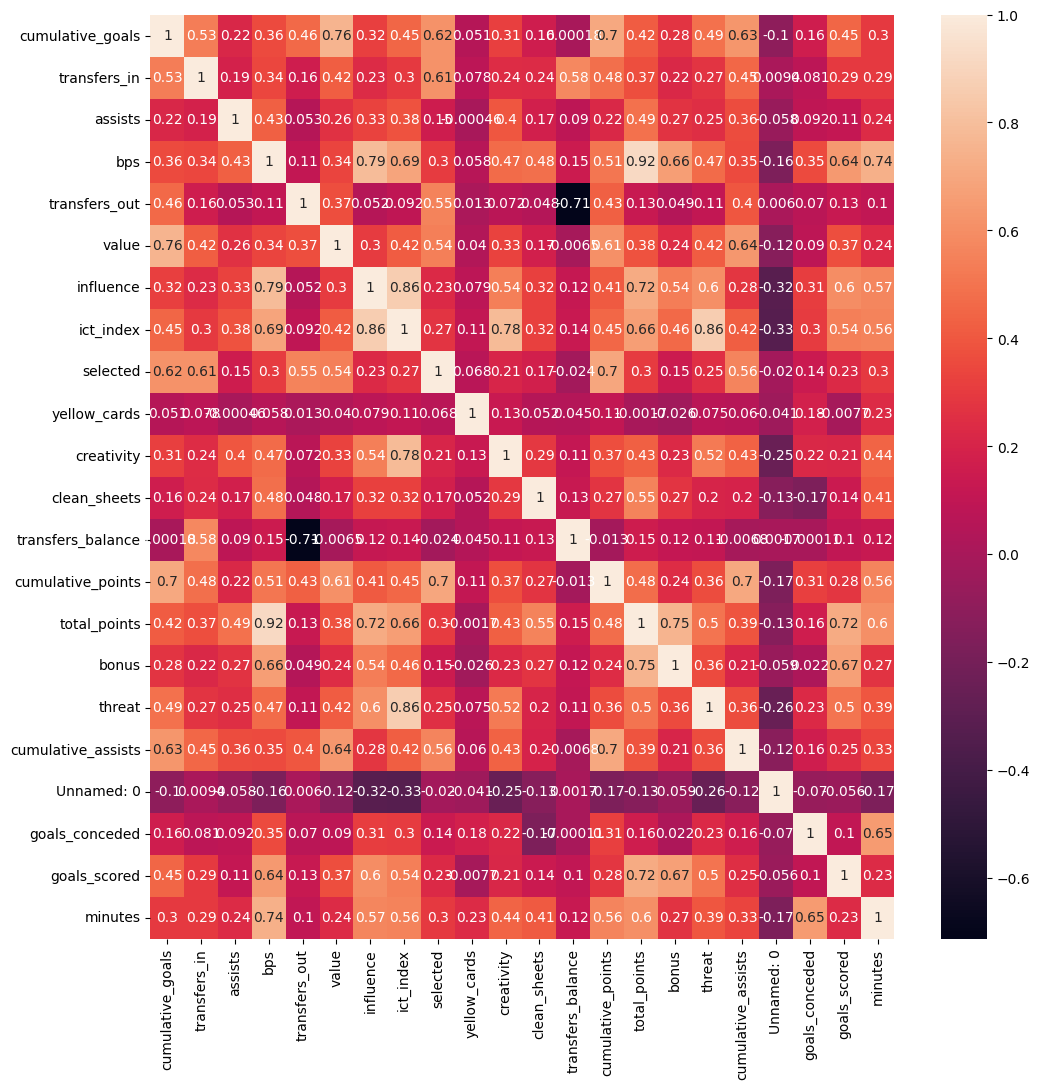

In [54]:
corr_matrix = filter_df[relevant_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr_matrix,ax=axes, annot=True);

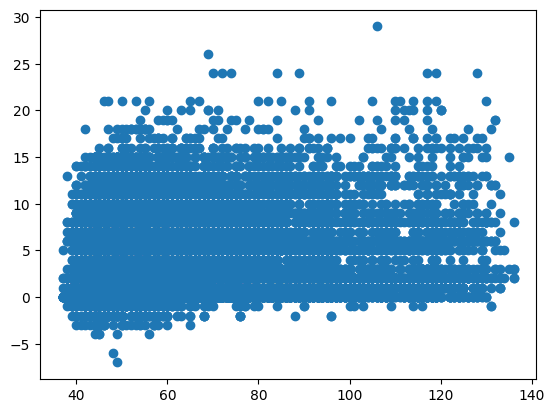

In [55]:
plt.scatter(df["value"], df["total_points"]);

In [56]:
# sns.jointplot(
#     "total_points", "value", data=df, kind="kde", color="b"
# );

In [57]:
# sns.lmplot(
#     "total_points", "value", data=df, hue="position", fit_reg=False
# );

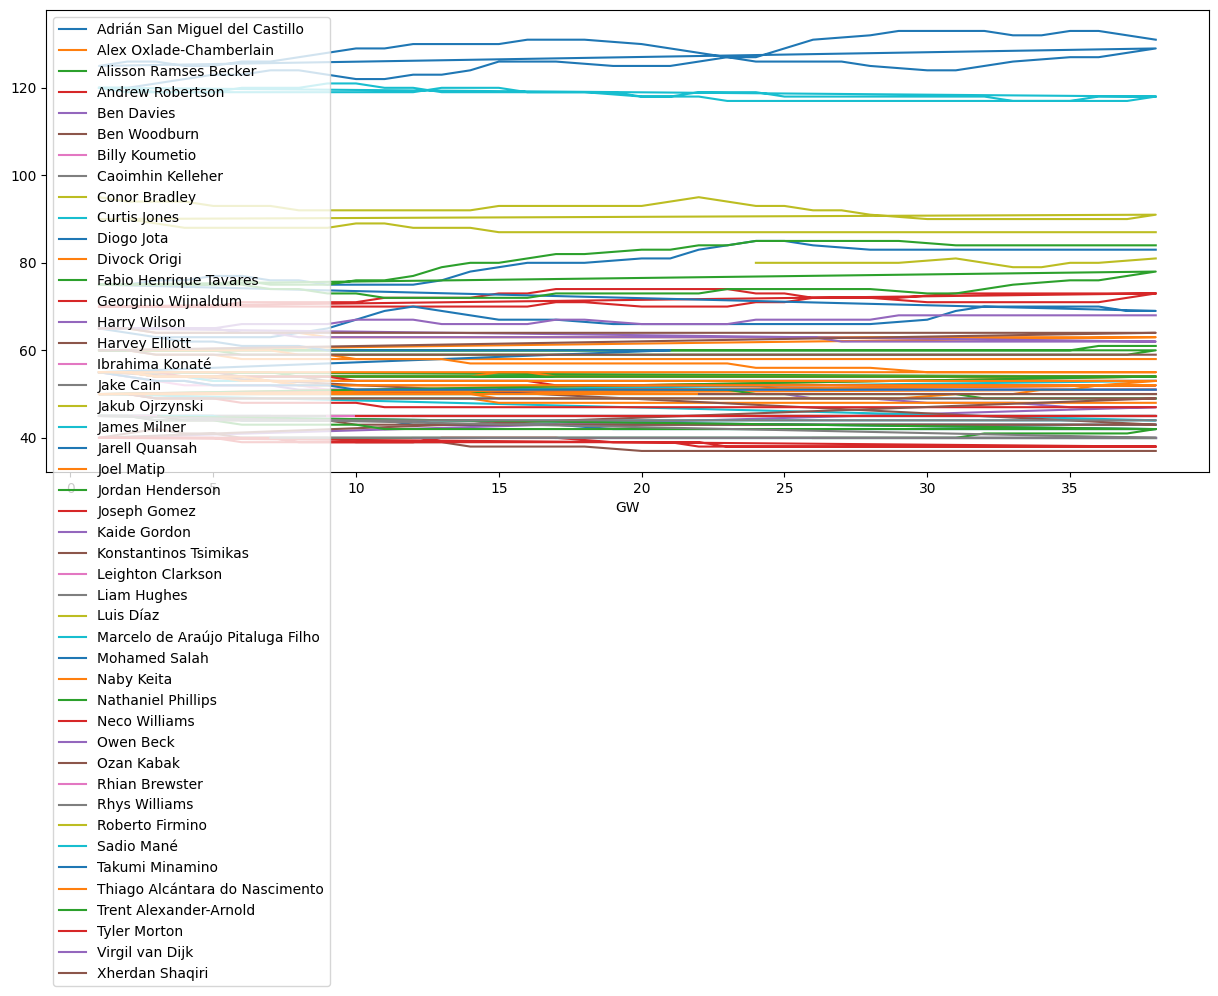

In [58]:
#time_series = df[df['team_x'] == "Wolves", df['season_x'] == "2021-22"]
# salah = df[df['team_x'] == "Liverpool"]
# value = salah['value'].groupby(salah['name'])
# value.index = salah['GW']

# value.plot(figsize=(15, 6))
# plt.show()

salah = df[df['team_x'] == "Liverpool"]
grouped = salah.groupby('name')

fig, ax = plt.subplots(figsize=(15, 6))

for name, group in grouped:
    ts = group.set_index('GW')['value']
    ts.plot(label=name, ax=ax)

plt.legend()
plt.show()


Data Cleaning

In [60]:
dfA = pd.read_csv('data/cleaned_merged_seasons.csv')
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98402 entries, 0 to 98401
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98402 non-null  int64  
 1   season_x           98402 non-null  object 
 2   name               98402 non-null  object 
 3   position           98402 non-null  object 
 4   team_x             48930 non-null  object 
 5   assists            98402 non-null  int64  
 6   bonus              98402 non-null  int64  
 7   bps                98402 non-null  int64  
 8   clean_sheets       98402 non-null  int64  
 9   creativity         98402 non-null  float64
 10  element            98402 non-null  int64  
 11  fixture            98402 non-null  int64  
 12  goals_conceded     98402 non-null  int64  
 13  goals_scored       98402 non-null  int64  
 14  ict_index          98402 non-null  float64
 15  influence          98402 non-null  float64
 16  kickoff_time       984

C:\Users\22352155\AppData\Local\Temp\ipykernel_16088\99665328.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfA = pd.read_csv('data/cleaned_merged_seasons.csv')


In [61]:
dfA.shape

(98402, 38)

In [62]:
print('We have {} NaN/Null values in this dataset'.format(dfA.isnull().values.sum()))

We have 49570 NaN/Null values in this dataset


In [67]:
pd.set_option("display.max_columns", None)
dfA.head(6)

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1
5,5,2016-17,Adam Lallana,MID,NaN,1,2,33,0,33.7,205,8,3,1,14.2,51.2,2016-08-14T15:00:00Z,75,1,Arsenal,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,False,1,1
